Introduction:

Seattle has always been a desirable city. Siyuan Liu is a young artist who plans to move to Seattle and open her first personal art exhibition there. I plan to use a data-driven method to analyze the cultural space resources of each block and neighbor in Seattle to present a recommendation to Siyuan. Through that process, I also hope can help other artists who faced the similar problem of moving to a new city.


Data:

Cultural Space Inventory data from government website: https://data.seattle.gov/ 
Geocoder Seattle location data
Seattle location data from FourSquare API, including venue ID, venue Name, Latitude and Longitude, and category name.

Methodology: 
•	Data Cleanup and re-grouping: retrieved data, clean up unwanted data, drop uncompleted and missing data, check data type, fix if needed, and add geographical coordinates.
•   Top Neighborhood Cultural Space Inventory Counts.
•   Use seaborn and matplotlib.pyplot to generate graph.
•   Top 10 most common Cultural Space Inventory type counts.
•	Using Geocoder Seattle to retrieve cordinate data and render map with folium.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# Use the inline backend to generate the plots within the browser
%matplotlib inline 

from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
sns.set_style("darkgrid")

import requests # library to handle requests
import lxml.html as lh
import bs4 as bs
import urllib.request

from IPython.display import HTML
import base64

#import extra just in case
print('Libraries imported.')


Libraries imported.


Get data & Data Cleanup

In [55]:
raw = pd.read_csv("https://data.seattle.gov/api/views/vsxr-aydq/rows.csv", usecols=cloumns)
cloumns = ['Neighborhood','Dominant Discipline','Name','Stability Index (5=very stable, 1=very uncertain)','Closed?','Latitude','Longitude']
#drop closed and unknown
raw_clean = raw[raw['Closed?'].isin(['0'])]
#drop Stability Index (5=very stable, 1=very uncertain) is lower than 3
raw_clean = raw_clean[raw_clean['Stability Index (5=very stable, 1=very uncertain)'].isin(['3','4','5'])]
#drop empty cell
raw_clean = raw_clean.dropna()
raw_clean = raw_clean.reset_index(drop=True)
raw_clean = raw_clean[['Neighborhood','Dominant Discipline','Name','Latitude','Longitude']]

raw_clean.head()

,Neighborhood,Dominant Discipline,Name,Latitude,Longitude
0,Uptown,Visual,Canlis Glass,47.618262,-122.357741
1,Greenwood,Multi-use,Woodland Park United Methodist,47.685528,-122.355046
2,Seattle Center in Uptown,Performance,Seattle Center/Center House Theatre,47.620569,-122.350491
3,Downtown,Music,Benaroya Hall,47.608128,-122.336975
4,Lake City Way,Multi-use,George Center for Community,47.719929,-122.305033


In [62]:
#group by neighborhood, Dominant Discipline
raw_g = raw_clean.sort_values(by=['Neighborhood','Dominant Discipline']).reset_index(drop=True)
raw_g.head(10)

,Neighborhood,Dominant Discipline,Name,Latitude,Longitude
0,Alki,Heritage,Southwest Seattle Historical Society,47.577553,-122.410950
1,Ballard,Arts/Cultural Training or Education,New York Fashion Academy,47.665419,-122.382443
2,Ballard,Cinema,Majestic Bay,47.668857,-122.384104
3,Ballard,Community Center,Ballard Community Center,47.672783,-122.391548
4,Ballard,Community Center,Ballard NW Senior Center,47.668369,-122.398666
5,Ballard,Literary,Seattle Public Library Ballard,47.669822,-122.384317
6,Ballard,Multi-use,Nordic Museum,47.677699,-122.396359
7,Ballard,Multi-use,Ballard Alki Lodge IOOF-Ballard-Alki Lodge #170,47.668941,-122.379323
8,Ballard,Multi-use,St. Luke's Episcopal Church Seattle,47.670410,-122.384102
9,Ballard,Music,Sonic Boom,47.668522,-122.385106


Check counts

In [64]:
raw_counts = raw_g.groupby('Neighborhood').count()
raw_counts

,Dominant Discipline,Name,Latitude,Longitude
Neighborhood,,,,
Alki,1,1,1,1
Ballard,19,19,19,19
Beacon Hill,6,6,6,6
Belltown,12,12,12,12
Boeing Field,1,1,1,1
Capitol Hill,28,28,28,28
Central District,13,13,13,13
Chinatown International District,2,2,2,2
Columbia City,14,14,14,14


Top Neighborhood Cultural Space Inventory Counts

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

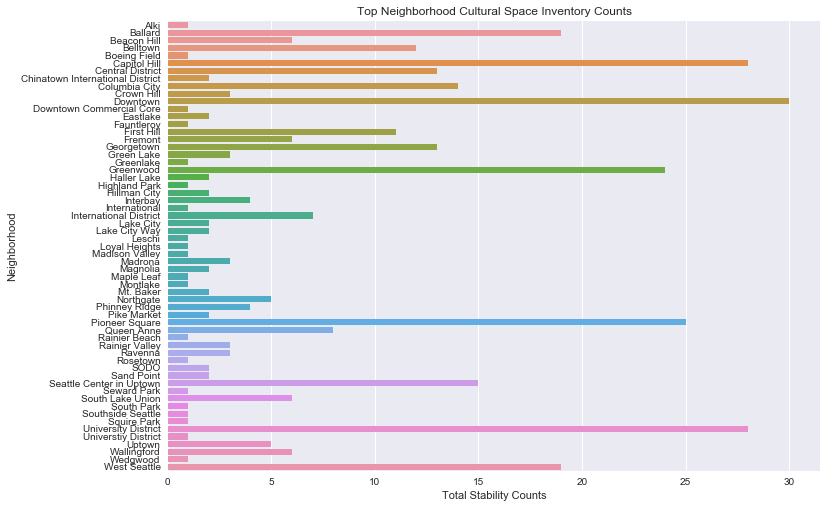

In [67]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax0 = sns.barplot(data = raw_counts.reset_index(), x = 'Name', y = 'Neighborhood')
ax0.set_title("Top Neighborhood Cultural Space Inventory Counts")
ax0.set_xlabel('Total Stability Counts')
plt.show()

Top 10 most common Cultural Space Inventory type

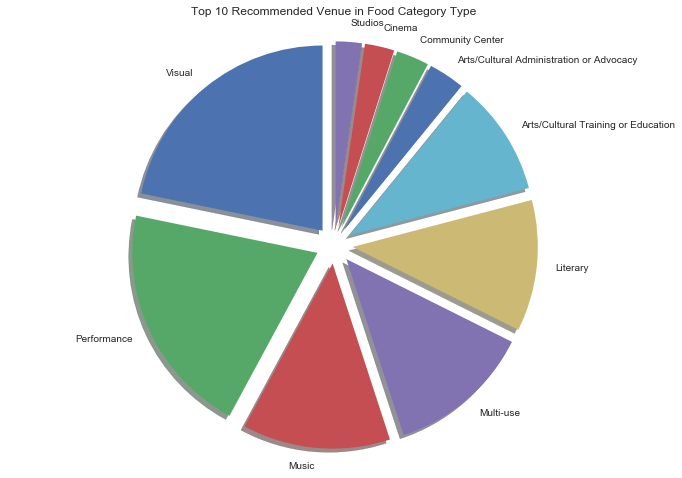

,Dominant Discipline,Name
0,Visual,76
1,Performance,71
2,Music,45
3,Multi-use,44
4,Literary,40
5,Arts/Cultural Training or Education,35
6,Arts/Cultural Administration or Advocacy,11
7,Community Center,10
8,Cinema,9
9,Studios,8


In [68]:
top_10 = raw_clean.groupby('Dominant Discipline')['Name'].count().sort_values(ascending=False)[:10].reset_index()
labels = top_10['Dominant Discipline']
sizes  = top_10['Name']
explode = [.1] * 10
# Plot
plt.title("Top 10 Cultural Space Inventory")
ax1 = plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
plt.axis('equal')
plt.show()
top_10

In [70]:
# explore Seattle
print('The dataframe has {} Neighborhood and {} Cultural Space Inventories.'.format(
        len(raw_g['Neighborhood'].unique()),
        raw_g.shape[0]
    )
)

The dataframe has 59 Neighborhood and 365 Cultural Space Inventories.


In [74]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from geopy.geocoders import Nominatim
address = 'Seattle, United States'

geolocator = Nominatim(user_agent="Seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

# create map of Seattle using latitude and longitude values
map_Seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, raw_g in zip(raw_g['Latitude'], raw_g['Longitude'], raw_g['Neighborhood'], raw_g['Name']):
    label = '{}, {}'.format(raw_g, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Seattle)  
    
map_Seattle

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.
